In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import csv

In [22]:
def read_bird(filename="bird_to_attrs.csv"):
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        i = 0
        bird_name = []
        attr_list = []
        for row in reader:
            if i == 0:
                attribute = row[1:]
            else:
                bird_name.append(row[0])
                attr_list.append(row[1:])
            i += 1
    bird_name = np.array(bird_name)
    attribute = np.array(attribute)
    attr_list = np.array(attr_list).astype(np.int)
    return bird_name, attribute, attr_list


In [23]:
def bar_plot(y):
    x = np.arange(0,288,1)
    plt.bar(x, y)
    plt.ylabel("# of occurence")
    plt.xlabel("attribute number")
    plt.show()
    
    return 0

In [24]:
def log_weight_attr(attr_list, k):
    attr_count = np.zeros(len(attr_list[0]))
    for i in range(len(attr_list[0])):
        attr_count[i] = (np.sum(attr_list[:,i]))
    
    nor_attr_count = attr_count / np.max(attr_count)
    nor_attr_count2 = nor_attr_count
    for i in range(288):
        if(nor_attr_count2[i] == 0):
            nor_attr_count2[i] = 1
    nor_attr_count3 = (-1*k)* np.log(nor_attr_count2)
    attr_list_log = attr_list * nor_attr_count3
    return attr_list_log

In [25]:
def bird_index_lookup(bird_list, name):
    index = 0
    for bird in bird_list:
        if name == bird:
            bird_index = index
            break
        index += 1
    return bird_index

In [7]:
def accuracy(perdict, Y):
    count = np.sum(np.equal(perdict, Y))
    return (count/ np.shape(Y)[0])

In [26]:
def load_CNN(filename="cnn_res.csv"):
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        i = 0
        predict_x = []
        bird_y = []
        for row in reader:
            word = (row[0])
            if i != 0:
                predict_x.append(np.array(row[1:]).astype(np.int))
                path = word.split('/')
                bird = path[2].split('.')[1]
                name = bird.replace('_', ' ')
                bird_y.append(bird_index_lookup(bird_name, name))
            i += 1
    predict_x = np.array(predict_x)
    bird_y = np.array(bird_y)
    
    return predict_x, bird_y

In [27]:
def make_prediction(attr_list_log2, predict_x):
    result = np.zeros(predict_x.shape[0])
    for i in range(predict_x.shape[0]):
        score = np.zeros(200)
        for j in range(200):
            score[j] = np.dot(predict_x[i], attr_list_log2[j])
        result[i] = np.argmax(score)
    return result


In [28]:
bird_name, attribute, attr_list = read_bird()

In [29]:
k_list = [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
for k in k_list:
    attr_list_log2 = log_weight_attr(attr_list, k)
    predict_x, bird_y = load_CNN()
    pre_y = make_prediction(attr_list_log2, predict_x)
    print("currently with k: ", k, ". Acc is :", accuracy(result,bird_y))

currently with k:  0.1 . Acc is : 0.312
currently with k:  1 . Acc is : 0.312
currently with k:  10 . Acc is : 0.312
currently with k:  100 . Acc is : 0.312
currently with k:  1000 . Acc is : 0.312
currently with k:  10000 . Acc is : 0.312
currently with k:  100000 . Acc is : 0.312
currently with k:  1000000 . Acc is : 0.312


# demonstration

In [31]:
attr_count = np.zeros(len(attr_list[0]))
for i in range(len(attr_list[0])):
    attr_count[i] = (np.sum(attr_list[:,i]))

nor_attr_count = attr_count / np.max(attr_count)
nor_attr_count2 = nor_attr_count
for i in range(288):
    if(nor_attr_count2[i] == 0):
        nor_attr_count2[i] = 1
nor_attr_count3 = (-1*100)* np.log(nor_attr_count2)

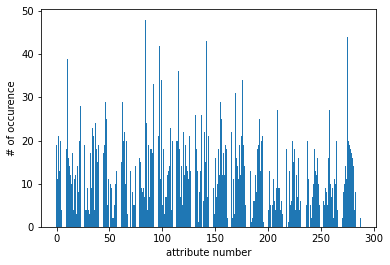

In [264]:
x = np.arange(0,288,1)
plt.bar(x, attr_count)
plt.ylabel("# of occurence")
plt.xlabel("attribute number")
plt.show()


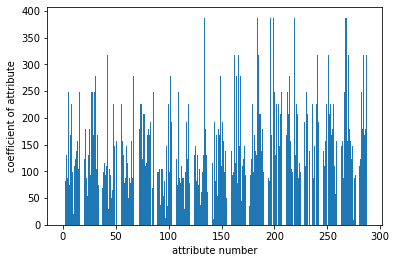

In [265]:
x = np.arange(0,288,1)
plt.bar(x, nor_attr_count3)
plt.ylabel("coefficient of attribute")
plt.xlabel("attribute number")
plt.show()


#######################################################################################################################

In [ ]:
x = np.arange(0,288,1)
plt.bar(x, attr_count)
plt.ylabel("# of occurence")
plt.xlabel("attribute number")
plt.show()

In [132]:
attr_count = np.zeros(len(attr_list[0]))
for i in range(len(attr_list[0])):
    attr_count[i] = (np.sum(attr_list[:,i]))

In [34]:
len(attr_list[0])

288

In [133]:

print(np.max(attr_count))
min_index = np.argmin(attr_count)
max_index = np.argmax(attr_count)

110.0


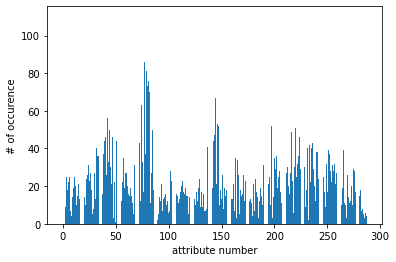

0

In [134]:
bar_plot(attr_count)

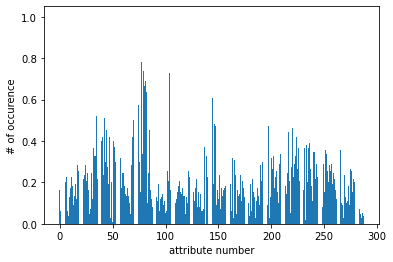

0
1.0 0.0


In [140]:
nor_attr_count = attr_count / np.max(attr_count)
nor_attr_count2 = nor_attr_count
print(bar_plot(nor_attr_count2))
print(nor_attr_count2[max_index], nor_attr_count2[min_index])

In [141]:
for i in range(288):
    if(nor_attr_count2[i] == 0):
        nor_attr_count2[i] = 1
for i in range(50):
    print(nor_attr_count2[i], attr_count[i])

0.16363636363636364 18.0
0.06363636363636363 7.0
0.08181818181818182 9.0
0.22727272727272727 25.0
0.16363636363636364 18.0
0.2 22.0
0.22727272727272727 25.0
0.06363636363636363 7.0
0.03636363636363636 4.0
0.12727272727272726 14.0
0.17272727272727273 19.0
0.22727272727272727 25.0
0.18181818181818182 20.0
0.09090909090909091 10.0
0.13636363636363635 15.0
0.19090909090909092 21.0
0.11818181818181818 13.0
0.2818181818181818 31.0
0.2545454545454545 28.0
0.21818181818181817 24.0
0.12727272727272726 14.0
0.09090909090909091 10.0
0.21818181818181817 24.0
0.23636363636363636 26.0
0.2818181818181818 31.0
0.20909090909090908 23.0
0.24545454545454545 27.0
0.16363636363636364 18.0
0.045454545454545456 5.0
0.07272727272727272 8.0
0.24545454545454545 27.0
0.11818181818181818 13.0
0.36363636363636365 40.0
0.32727272727272727 36.0
0.32727272727272727 36.0
0.5181818181818182 57.0
0.21818181818181817 24.0
0.14545454545454545 16.0
0.33636363636363636 37.0
0.4 44.0
0.41818181818181815 46.0
0.23636363636363

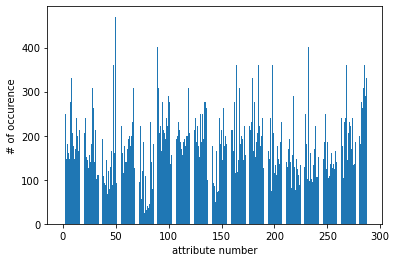

0


In [150]:
nor_attr_count3 = (-100)* np.log(nor_attr_count2)
print(bar_plot(nor_attr_count3))

In [161]:
for i in range(100):
    print(attr_list_log2[i][1], attr_list_log[i][1])

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
275.4570216737103 275.4570216737103
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
275.4570216737103 275.4570216737103
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


In [156]:
attr_list_log = attr_list * nor_attr_count3
print(attr_list_log[1][2], attr_list[1][2],attr_list_log[1,2])

250.3255788456197 1 250.3255788456197
